In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

# Data

In [2]:
data_filename = '/Users/kellydouglass/Desktop/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt'

data_table = Table.read(data_filename, format='ascii.commented_header')

In [3]:
bad_boolean = data_table['curve_used'] == -99

good_galaxies = data_table[~bad_boolean]

In [4]:
HI_boolean = np.logical_or(good_galaxies['logHI'] == -99, good_galaxies['logHI'] == -999)

goodHI_galaxies = good_galaxies[~HI_boolean]

## Calculate mass ratios

In [5]:
good_galaxies['Mstar_Mtot_ratio'] = good_galaxies['Mstar']/good_galaxies['Mtot']
good_galaxies['MstarNSA_Mtot_ratio'] = good_galaxies['NSA_Mstar']/good_galaxies['Mtot']

goodHI_galaxies['Mstar_Mtot_ratio'] = goodHI_galaxies['Mstar']/goodHI_galaxies['Mtot']
goodHI_galaxies['MstarNSA_Mtot_ratio'] = goodHI_galaxies['NSA_Mstar']/goodHI_galaxies['Mtot']

In [6]:
BC_boolean = good_galaxies['CMD_class'] == 1
GV_boolean = good_galaxies['CMD_class'] == 2
RS_boolean = good_galaxies['CMD_class'] == 3

BC = good_galaxies[BC_boolean]
GV = good_galaxies[GV_boolean]
RS = good_galaxies[RS_boolean]

In [7]:
BC_HI_boolean = goodHI_galaxies['CMD_class'] == 1
GV_HI_boolean = goodHI_galaxies['CMD_class'] == 2
RS_HI_boolean = goodHI_galaxies['CMD_class'] == 3

BC_HI = goodHI_galaxies[BC_HI_boolean]
GV_HI = goodHI_galaxies[GV_HI_boolean]
RS_HI = goodHI_galaxies[RS_HI_boolean]

# Stellar-Halo Mass Relation (SHMR)

<IPython.core.display.Javascript object>


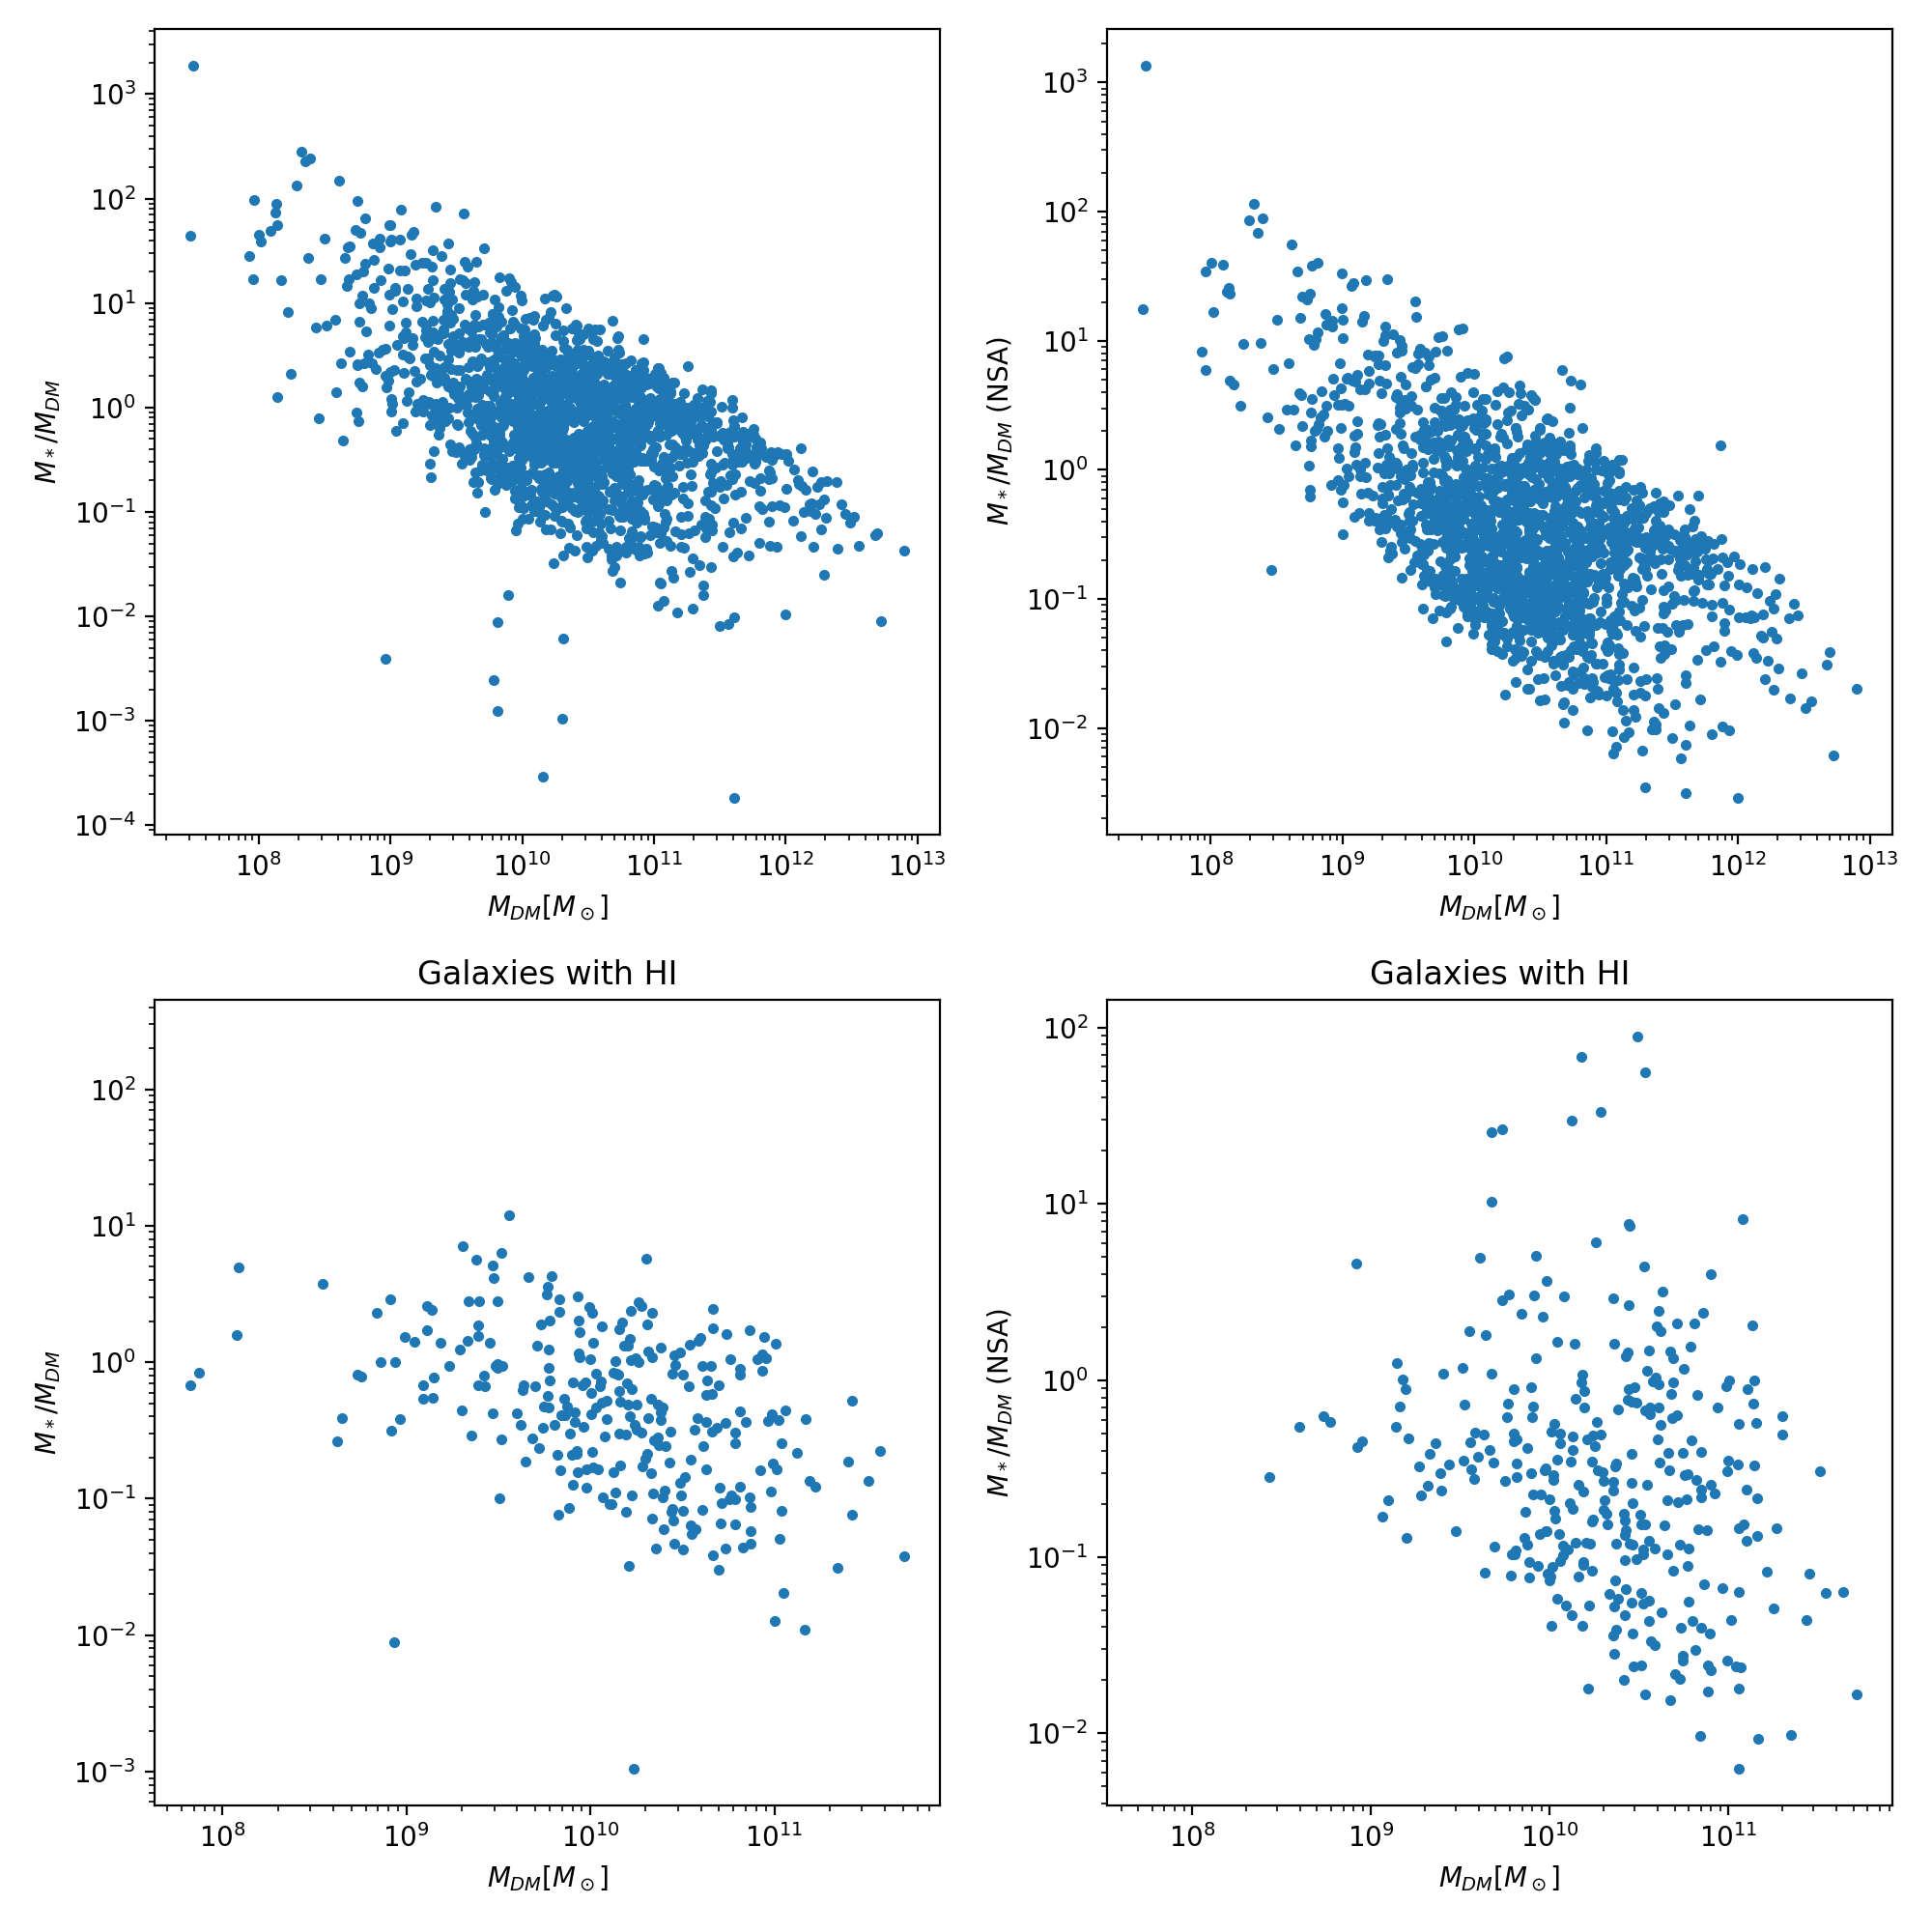

In [23]:
plt.figure(figsize=(10,10))


plt.subplot(221)
plt.loglog(good_galaxies['Mdark'], good_galaxies['Mstar']/good_galaxies['Mdark'], '.')
plt.xlabel(r'$M_{DM} [M_\odot]$')
plt.ylabel('$M_*/M_{DM}$')


plt.subplot(222)
plt.loglog(good_galaxies['Mdark'], good_galaxies['NSA_Mstar']/good_galaxies['Mdark'], '.')
plt.xlabel(r'$M_{DM} [M_\odot]$')
plt.ylabel('$M_*/M_{DM}$ (NSA)')


plt.subplot(223)
plt.loglog(goodHI_galaxies['Mtot'] - (goodHI_galaxies['Mstar'] + 10**goodHI_galaxies['logHI']), 
           goodHI_galaxies['Mstar']/goodHI_galaxies['Mdark'], '.')
plt.xlabel(r'$M_{DM} [M_\odot]$')
plt.ylabel('$M_*/M_{DM}$')
plt.title('Galaxies with HI')


plt.subplot(224)
plt.loglog(goodHI_galaxies['Mtot'] - (goodHI_galaxies['NSA_Mstar'] + 10**goodHI_galaxies['logHI']), 
           goodHI_galaxies['NSA_Mstar']/goodHI_galaxies['Mdark'], '.')
plt.xlabel(r'$M_{DM} [M_\odot]$')
plt.ylabel('$M_*/M_{DM}$ (NSA)')
plt.title('Galaxies with HI')


plt.tight_layout();

In [10]:
def bin_median(data, bin_quantity, bins, median_quantity):
    '''
    Calculate the median value of the quantity median_quantity when the objects in 
    data are binned by bin_quanitity.
    
    
    PARAMETERS
    ==========
    
    data : astropy table
        Galaxy data
        
    bin_quantity : string
        Name of column in data by which to bin the data
        
    bins : ndarray of shape (n,)
        Array of bin edges
        
    median_quantity : string
        Name of column in data for which to calculate the median once the data is 
        binned
        
        
    RETURNS
    =======
    
    binned_data : ndarray of shape (n,)
        Median values of median_quantity for each bin of bin_quantity
        
    binned_err : ndarray of shape (n,)
        Statistical uncertainty in each bin (1/sqrt(N), where N is the number of 
        objects in the bin)
    '''
    
    if bin_quantity in ['Mstar', 'NSA_Mstar', 'Mstar_NSA']:
        bin_indices = np.digitize(np.log10(data[bin_quantity]), bins)
    else:
        bin_indices = np.digitize(data[bin_quantity], bins)
    
    n_bins = len(bins)
    
    binned_median = np.zeros(n_bins)
    binned_err = np.zeros(n_bins)
    
    for i in range(n_bins):
        # Find galaxies in this bin
        gal_in_bin = bin_indices == i
        
        # Calculate median of galaxies in bin
        '''
        if median_quantity in ['Mstar', 'NSA_Mstar', 'Mtot', 'Mstar_NSA']:
            binned_median[i] = np.log10(np.nanmedian(data[median_quantity][gal_in_bin]))
        else:
        '''
        binned_median[i] = np.nanmedian(data[median_quantity][gal_in_bin])
        
        # Calculate statistical uncertainty in bin
        binned_err[i] = 1/np.sqrt(sum(gal_in_bin))
        
    return binned_median, binned_err

In [12]:
Mdark_bins = np.logspace(8,13,12)
Mdark_bin_width = Mdark_bins[1] - Mdark_bins[0]

Mstar_binned, Mstar_binned_err = bin_median(good_galaxies, 'Mdark', Mdark_bins, 'Mstar')

<IPython.core.display.Javascript object>


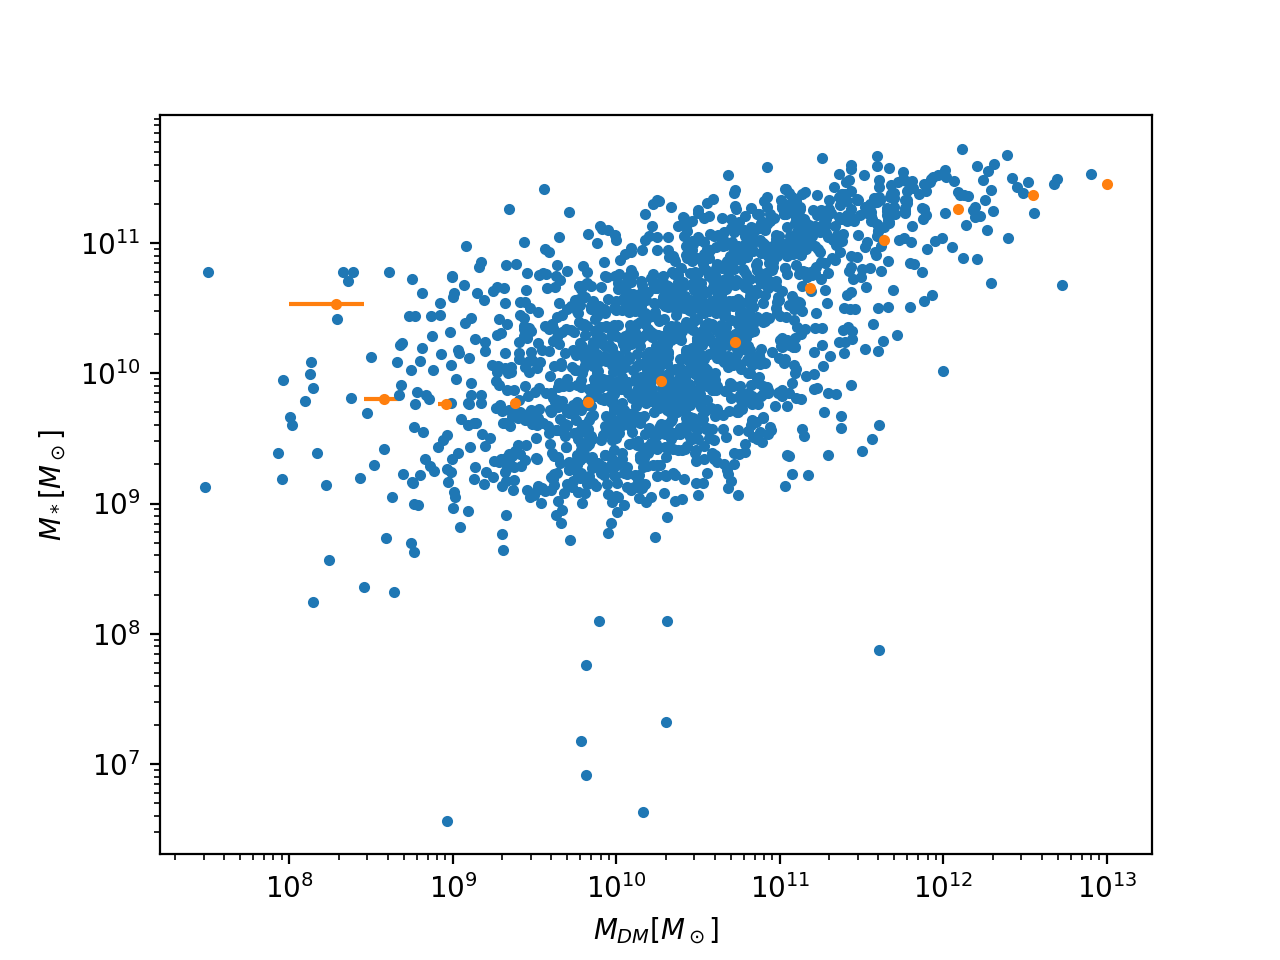

In [15]:
plt.figure()

plt.loglog(good_galaxies['Mdark'], good_galaxies['Mstar'], '.')
plt.errorbar(Mdark_bins + 0.5*Mdark_bin_width, Mstar_binned, 
             xerr=0.5*Mdark_bin_width, yerr=Mstar_binned_err, 
             fmt='.')

plt.xlabel(r'$M_{DM} [M_\odot]$')
plt.ylabel(r'$M_* [M_\odot]$');

In [22]:
goodHI_galaxies.colnames

['MaNGA_plate',
 'MaNGA_IFU',
 'NSA_plate',
 'NSA_fiberID',
 'NSA_MJD',
 'NSA_index',
 'NSA_RA',
 'NSA_DEC',
 'NSA_ba',
 'NSA_phi',
 'NSA_redshift',
 'NSA_Mstar',
 'vflag',
 'avg_v_max',
 'avg_v_max_sigma',
 'avg_alpha',
 'avg_alpha_sigma',
 'avg_chi_square_rot',
 'pos_v_max',
 'pos_v_max_sigma',
 'pos_alpha',
 'pos_alpha_sigma',
 'pos_chi_square_rot',
 'neg_v_max',
 'neg_v_max_sigma',
 'neg_alpha',
 'neg_alpha_sigma',
 'neg_chi_square_rot',
 'center_flux',
 'center_flux_error',
 'Mtot',
 'Mtot_error',
 'Mdark',
 'Mdark_error',
 'Mstar',
 'Mdark_Mstar_ratio',
 'Mdark_Mstar_ratio_error',
 'rabsmag',
 'avg_r_turn',
 'avg_r_turn_sigma',
 'pos_r_turn',
 'pos_r_turn_sigma',
 'neg_r_turn',
 'neg_r_turn_sigma',
 'logNO',
 't3',
 'BPT',
 'curve_used',
 'points_cut',
 'avg_chi_square_ndf',
 'pos_chi_square_ndf',
 'neg_chi_square_ndf',
 'index',
 'Z12logOH',
 'u_r_NSA',
 'frac_masked_spaxels',
 'smoothness_score',
 'Rmax',
 'CMD_class',
 'SFR',
 'sSFR',
 'Mstar_turn',
 'logHI',
 'WF50',
 'WP20',